# Classification: Customer Churn Prediction

In [11]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Import dataset
file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'
download_url = f'https://drive.google.com/uc?id={file_id}'

data = pd.read_csv(download_url)
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
# MISSING VALUE CHECKING:

print('Missing values every feature: \n', data.isnull().sum())

Missing values every feature: 
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# Exploratory Data Analysis

In [14]:
# cek dimensi data/ bentuk awal data
print(data.shape)

(10000, 14)


In [15]:
print(f"Informasi dataset: ")
data.info()

Informasi dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Dari informasi: <br>
1. Ada 10000 data, 14 fitur
2. 3 kategorikal, dan 11 numerik

In [16]:
# Cek apakah 10000 data mengandung duplikat customer (not unique)
data.CustomerId.nunique()

10000

SEMUA customer bersifat UNIQUE -> tidak ada customer duplikat

<Axes: xlabel='Exited'>

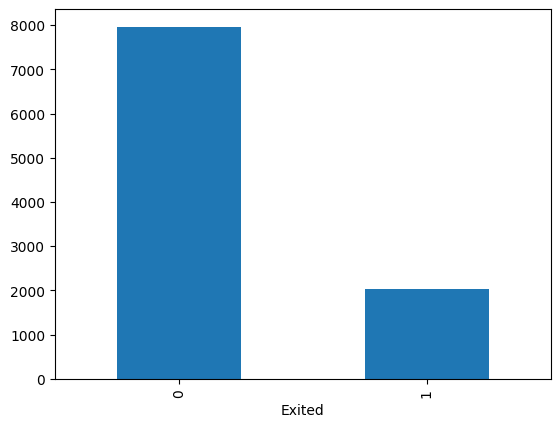

In [17]:
# cek persebaran data pelanggan yang churn dan tidak (exited or not-exited)
data.Exited.value_counts().plot(kind= 'bar')

Sekitar 20% dari total data, customer exited (churn)

# Exploratory Data Analysis (EDA) Numerik

Memilih variabel predictor yang bersifat numerik dan mmebuat plot bivariat, lalu mengiterpretasikannya<br><br>
Gunakan data (data) untuk diolah dan gunakan fungsi subplots() untuk membuat gambar dan satu set subplot

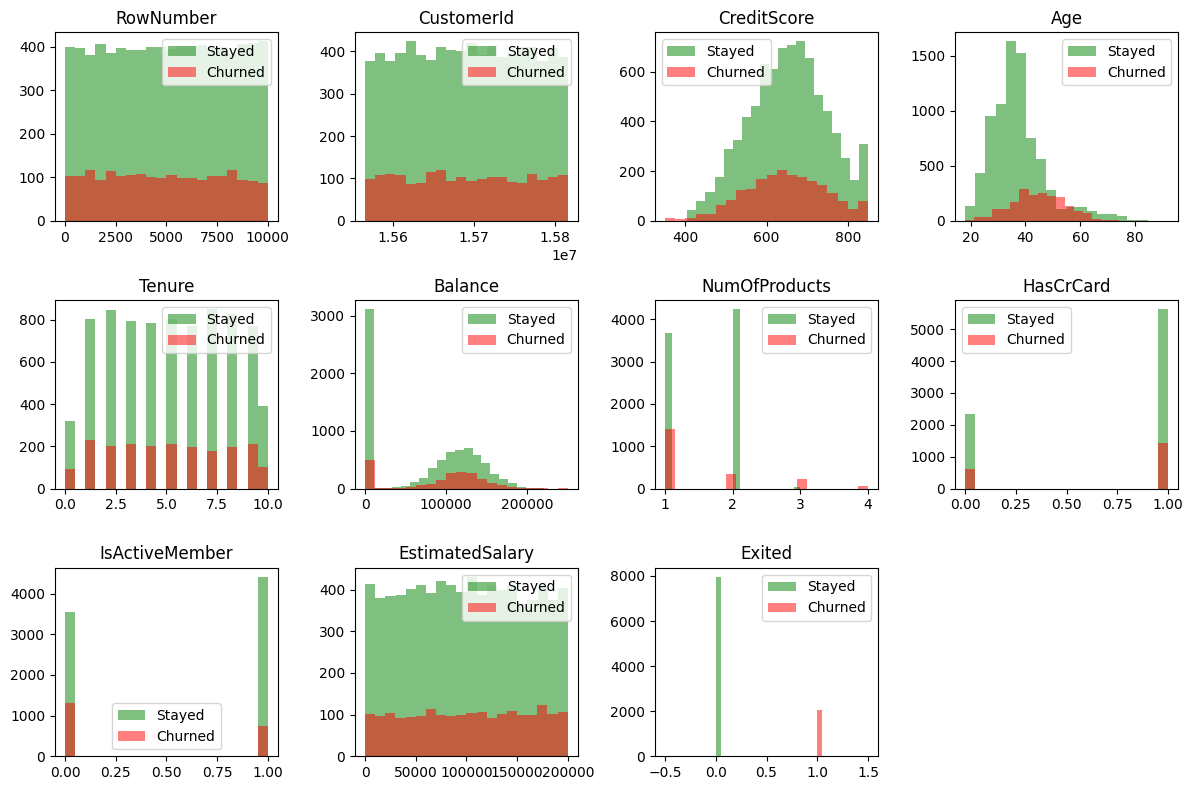

In [18]:
# Buat bin dalam chart
num_feature = data.select_dtypes(include=[np.number]).columns # ambil colomnya bukan langsung ambil DF
fig, ax = plt.subplots(3, 4, figsize=(12,8))
ax = ax.flatten() # ax itu 2 dimensi -> jadikan 1 dimensi agar mudah di loop

# Plot bivariat histogram data
for i, col in enumerate(num_feature):
  ax[i].hist(data[data.Exited == 0][col], bins=20, color='green', alpha=0.5, label='Stayed')
  ax[i].hist(data[data.Exited == 1][col], bins=20, color='red', alpha=0.5, label='Churned')
  ax[i].set_title(col)
  ax[i].legend()

# Hide axis tak terpakai
for i in range (len(num_feature), len(ax)): # banyak data number, panjang ax
  fig.delaxes(ax[i])

plt.tight_layout()
plt.show()


# Exploratory Data Analysis(EDA) Kategorikal

Gunakan data (data) untuk diolah dan fungsi countplot() untuk plot dengan jmlh pengamatan di setiap bin kategorik variabel

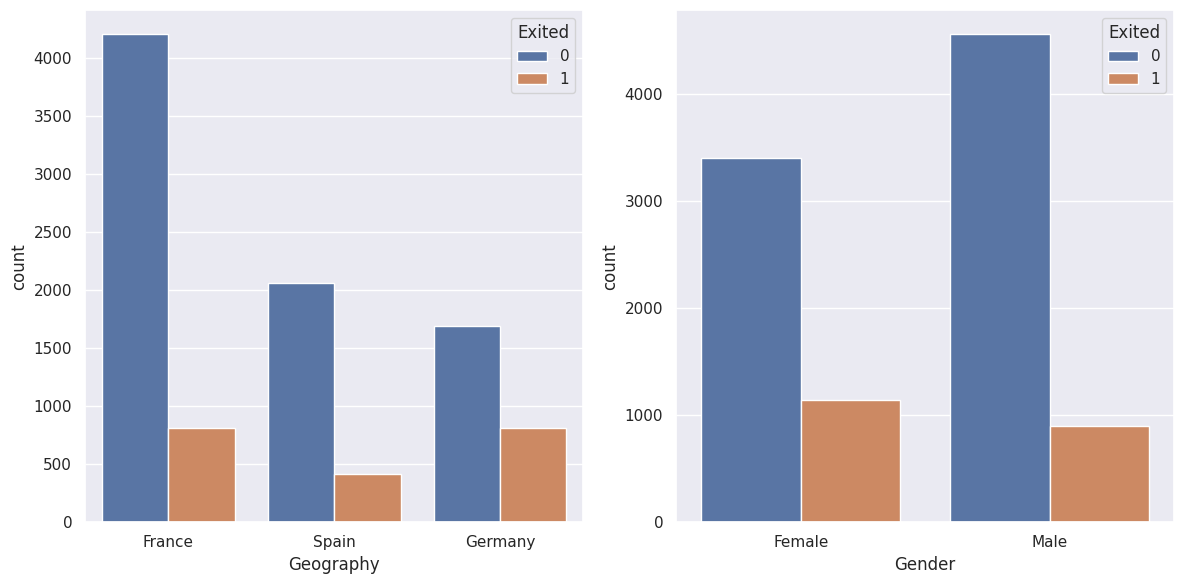

In [19]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.countplot(data=data, x = "Geography", hue='Exited', ax=ax[0])
sns.countplot(data=data, x = "Gender", hue='Exited', ax=ax[1])

plt.tight_layout()
plt.show()

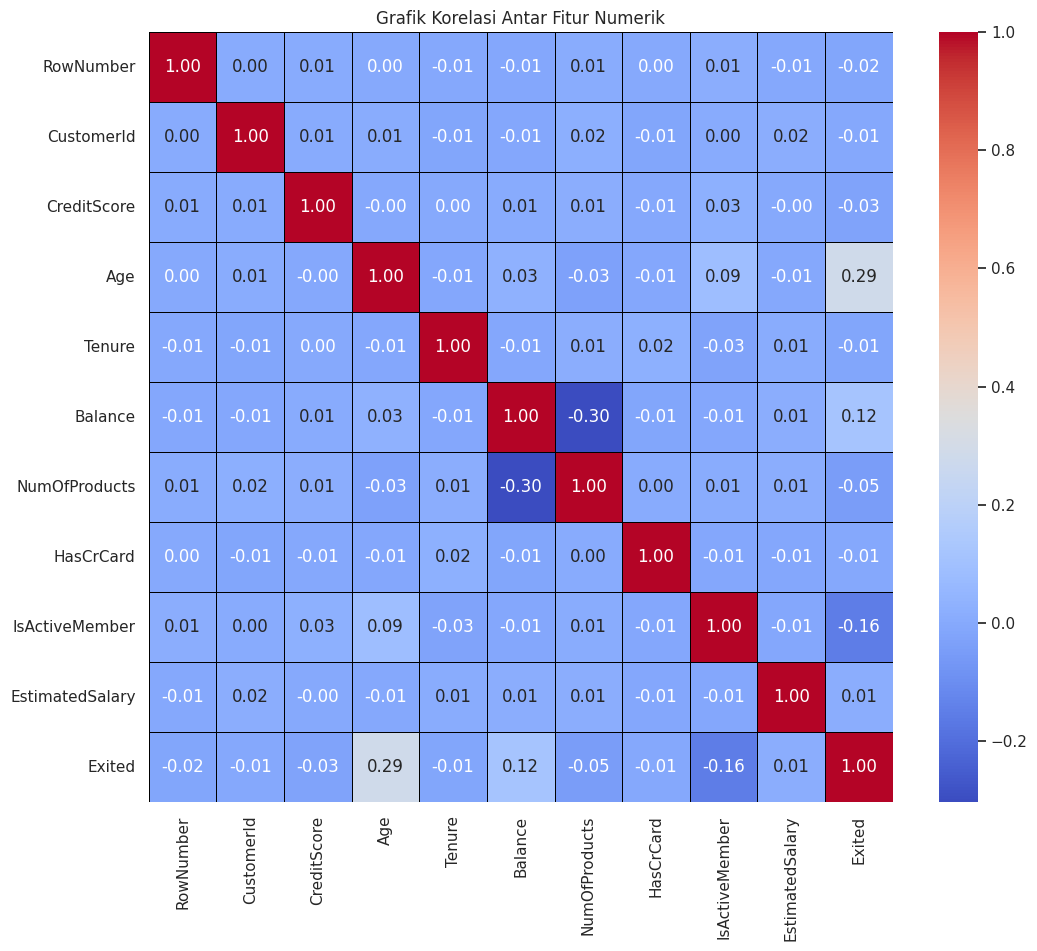

In [20]:
# Visualisasikan KORELASI antar fitur
num_fitur = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12,10))
matriks_korelasi = num_fitur.corr()
sns.heatmap(matriks_korelasi, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.7, linecolor='black')
plt.title("Grafik Korelasi Antar Fitur Numerik")
plt.show()

# HAPUS FEATURE TIDAK DIBUTUHKAN

Beberapa fitur tidak dibutuhkan seperti RowNumber, CustomerID, sama Surname

In [21]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
# Convert all the non-numeric columns to numerikcal dtype
for column in data.columns:
  if data[column].dtype == np.number:
    continue
    # If not numeric
  else:
   data[column] = LabelEncoder().fit_transform(data[column])
print(data.describe())

        CreditScore     Geography        Gender           Age        Tenure  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     259.584600      0.746300      0.545700     20.920600      5.012800   
std       96.496107      0.827529      0.497932     10.482065      2.892174   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      193.000000      0.000000      0.000000     14.000000      3.000000   
50%      261.000000      0.000000      1.000000     19.000000      5.000000   
75%      327.000000      1.000000      1.000000     26.000000      7.000000   
max      459.000000      2.000000      1.000000     69.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       0.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.00

# Splitting and Model Building

1. Gunakan data yang sudah di cleaned dan di encoder untuk displit menjadi 2 bagian(70% train, 30% testing) berdasarkan variabel predictor (X) dan target (Y).<br> <br>

Gunakan train_test_split() untuk membagi.<br>

2. Sertakan value_counts untuk mengecek apakah pembagian sudah sama proporsinya.

In [23]:
# SPLIT DATASET

# Tentukan predictor dan target
X = data.drop('Exited', axis = 1)
y = data['Exited']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print hasil berdasarkan proses dan bahan:
print('Jumlah baris dan kolom X_train: ', X_train.shape, 'Jumlah baris dan kolom dari y_train: ', y_train.shape)
print('\nPresentase Exited di data training adalah: ')
print(y_train.value_counts(normalize=True))

# Persentase churn di data tseting:
print('Jumlah baris dan kolom X_test: ', X_test.shape, 'Jumlah baris dan kolom dari y_test: ', y_test.shape)
print('Presentase Exited di data testing adalah: ')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom X_train:  (7000, 10) Jumlah baris dan kolom dari y_train:  (7000,)

Presentase Exited di data training adalah: 
Exited
0    0.792429
1    0.207571
Name: proportion, dtype: float64
Jumlah baris dan kolom X_test:  (3000, 10) Jumlah baris dan kolom dari y_test:  (3000,)
Presentase Exited di data testing adalah: 
Exited
0    0.805333
1    0.194667
Name: proportion, dtype: float64


# Model Building

using logistic regression


In [25]:
model = LogisticRegression()
log_model = model.fit(X_train, y_train)
print('Model Logistic Regression yang terbentuk: \n', log_model)

Model Logistic Regression yang terbentuk: 
 LogisticRegression()


# Model Evaluation

Ada 4 model testing:
1. Confussion Matrix
2. Accuray
3. Precission
4. Recall

In [26]:
# Predict
y_train_pred = log_model.predict(X_train)

# Print classification report
print("Classification Report Training Model (Logistic Regression): ")
print(classification_report(y_train, y_train_pred))


Classification Report Training Model (Logistic Regression): 
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      5547
           1       0.42      0.07      0.12      1453

    accuracy                           0.79      7000
   macro avg       0.61      0.52      0.50      7000
weighted avg       0.72      0.79      0.72      7000



In [27]:
print(f"Hasil confussion matriks data training (X): \n{confusion_matrix(y_train, y_train_pred)}")

Hasil confussion matriks data training (X): 
[[5402  145]
 [1348  105]]


In [28]:
print("Classification Report Test Model (Logistic Regression): ")
print(classification_report(y_test, log_model.predict(X_test)))

Classification Report Test Model (Logistic Regression): 
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      2416
           1       0.39      0.09      0.14       584

    accuracy                           0.80      3000
   macro avg       0.60      0.53      0.51      3000
weighted avg       0.73      0.80      0.74      3000



In [29]:
print('Hasil confussion matriks data testing: ')
print('lenght of data: ', len(y_test))
print(confusion_matrix(y_test, log_model.predict(X_test)))

Hasil confussion matriks data testing: 
lenght of data:  3000
[[2339   77]
 [ 534   50]]


In [30]:
# SIMPAN MODEL
import joblib

joblib.dump(model, '/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/LATIHAN KLASIFIKASI SUPERVISED/Churn Customer Classification/CustomerChurn.pkl')


['/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/LATIHAN KLASIFIKASI SUPERVISED/Churn Customer Classification/CustomerChurn.pkl']